In [40]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
usageHoursWeekday = {
    0: 5.168,
    0.5: 4.788,
    1.0: 4.294,
    1.5: 4.018,
    2.0: 3.635,
    2.5: 3.523,
    3.0: 3.287,
    3.5: 3.286,
    4.0: 3.137,
    4.5: 3.189,
    5.0: 3.157,
    5.5: 3.281,
    6.0: 3.431,
    6.5: 3.795,
    7.0: 4.113,
    7.5: 4.695,
    8.0: 5.344,
    8.5: 6.155,
    9.0: 6.668,
    9.5: 7.241,
    10.0: 7.101,
    10.5: 7.404,
    11.0: 7.263,
    11.5: 7.369,
    12.0: 7.206,
    12.5: 7.212,
    13.0: 6.992,
    13.5: 7.231,
    14.0: 7.536,
    14.5: 7.649,
    15.0: 7.497,
    15.5: 7.659,
    16.0: 7.805,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.527,
    18.5: 7.723,
    19.0: 7.756,
    19.5: 7.882,
    20.0: 7.985,
    20.5: 8.111,
    21.0: 8.019,
    21.5: 7.913,
    22.0: 7.564,
    22.5: 7.093,
    23.0: 6.455,
    23.5: 5.844,
}
totalMbWeekdayOriginalCurve = 0
for day in usageHoursWeekday:
    totalMbWeekdayOriginalCurve += usageHoursWeekday[day]
weekdayAreaUnderCurve = totalMbWeekdayOriginalCurve * 0.5
usageHoursWeekend = {
    0: 5.745,
    0.5: 5.383,
    1.0: 4.838,
    1.5: 4.525,
    2.0: 4.103,
    2.5: 3.902,
    3.0: 3.584,
    3.5: 3.519,
    4.0: 3.338,
    4.5: 3.339,
    5.0: 3.308,
    5.5: 3.319,
    6.0: 3.364,
    6.5: 3.651,
    7.0: 3.698,
    7.5: 4.041,
    8.0: 4.359,
    8.5: 4.817,
    9.0: 5.202,
    9.5: 5.492,
    10.0: 5.667,
    10.5: 5.939,
    11.0: 5.976,
    11.5: 6.048,
    12.0: 6.283,
    12.5: 6.303,
    13.0: 6.404,
    13.5: 6.601,
    14.0: 6.714,
    14.5: 6.868,
    15.0: 6.965,
    15.5: 6.994,
    16.0: 7.207,
    16.5: 7.864,
    17.0: 7.759,
    17.5: 7.679,
    18.0: 7.847,
    18.5: 7.865,
    19.0: 7.973,
    19.5: 8.102,
    20.0: 7.968,
    20.5: 7.858,
    21.0: 7.768,
    21.5: 7.843,
    22.0: 7.582,
    22.5: 7.372,
    23.0: 6.829,
    23.5: 6.254,
}
totalMbweekendOriginalCurve = 0
for day in usageHoursWeekend:
    totalMbweekendOriginalCurve += usageHoursWeekend[day]
weekendAreaUnderCurve = totalMbweekendOriginalCurve * 0.5

# make numpy array of values
weekdayNpY = np.array(list(usageHoursWeekday.values())).reshape(-1, 1)
weekendNpY = np.array(list(usageHoursWeekend.values())).reshape(-1, 1)

Weekday initial area under curve:  144.8985
Weekend area under curve:  138.02975


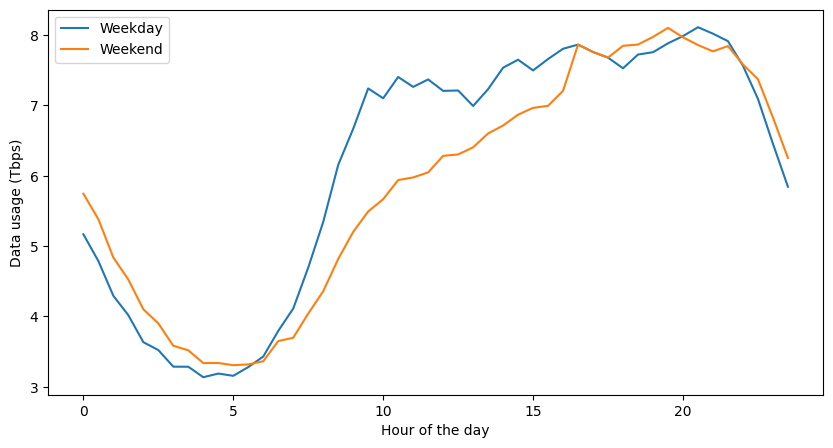

In [42]:
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(usageHoursWeekday.keys(), usageHoursWeekday.values(), label="Weekday")
plt.plot(usageHoursWeekend.keys(), usageHoursWeekend.values(), label="Weekend")
plt.xlabel("Hour of the day")
plt.ylabel("Data usage (Tbps)")
plt.legend()

# calculate the area under the plot using numpy
# multiplying by 0.5 because the x axis is in 0.5 increments
weekdayAreaUnderCurve = np.trapz(weekdayNpY, axis=0)*0.5
weekdayAreaUnderCurve = weekdayAreaUnderCurve[0]

weekendAreaUnderCurve = np.trapz(weekendNpY, axis=0)*0.5
weekendAreaUnderCurve = weekendAreaUnderCurve[0]

print("Weekday initial area under curve: ", weekdayAreaUnderCurve)
print("Weekend area under curve: ", weekendAreaUnderCurve)
plt.show()

In [43]:
# manually calculate the total Mb used by a given person per week by multiplying how many hours 
# that given person does a given activity by the Mb used per hour for that activity then
# summing all the activities

totalPersonMbPerWeek = 1235096

# weighted mean of the Mb per week into Mb per weekday and Mb per weekend day based off bandwidth usage during weekends compared to weekdays in the given reference data
referenceDataWeightedMean = ((weekdayAreaUnderCurve*5 + weekendAreaUnderCurve*2))/7
totalPersonMbWeekday = weekdayAreaUnderCurve/referenceDataWeightedMean * totalPersonMbPerWeek / 7
totalPersonMbWeekend = weekendAreaUnderCurve/referenceDataWeightedMean * totalPersonMbPerWeek / 7

print("Total person Mb per weekday: ", totalPersonMbWeekday)
print("Total person Mb per weekend: ", totalPersonMbWeekend)

Total person Mb per weekday:  178864.82437294614
Total person Mb per weekend:  170385.93906763467


In [48]:
# calculates k value to multiply the reference data by to get the total Mb per weekday/weekend day
k = totalPersonMbWeekday/weekdayAreaUnderCurve

print("k: ", k)
secsInADay = 86400
personUsageHoursWeekday = np.array(list(usageHoursWeekday.values())) * k
personUsageHoursWeekend = np.array(list(usageHoursWeekend.values())) * k

k:  1234.4146031390671


ValueError: x and y must have same first dimension, but have shapes (48,) and (1,)

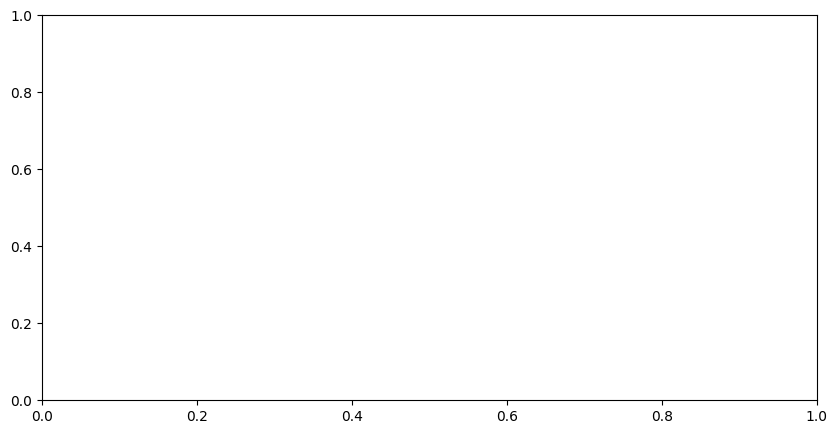

In [51]:
# plot the data
plt.figure(figsize=(10, 5))
plt.plot(usageHoursWeekday.keys(), personUsageHoursWeekday, label="Weekday")
plt.plot(usageHoursWeekend.keys(), personUsageHoursWeekend, label="Weekend")
plt.xlabel("Hour of the day")
plt.ylabel("Data usage (Mbps)")
plt.legend()
plt.show()

In [ ]:
# calculate the minimum bandwidth required to fulfill the person's needs 90% of the time
# 90th percentile of the data
personUsageHoursWeekday = np.array(list(usageHoursWeekday.values()))*k
personUsageHoursWeekend = np.array(list(usageHoursWeekend.values()))*k

personUsageHoursWeekday = np.sort(personUsageHoursWeekday)
personUsageHoursWeekend = np.sort(personUsageHoursWeekend)

personUsageHoursWeekday = personUsageHoursWeekday[int(len(personUsageHoursWeekday)*0.9)]
personUsageHoursWeekend = personUsageHoursWeekend[int(len(personUsageHoursWeekend)*0.9)]

print("90th percentile of weekday usage: ", personUsageHoursWeekday)
print("90th percentile of weekend usage: ", personUsageHoursWeekend)


90th percentile of weekday usage:  9729.655901942127
90th percentile of weekend usage:  9707.436439085624
